In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [8]:
# Step 1: Generate time series data (sine wave for simplicity)
data_points = 1000
time = np.linspace(0, 50, data_points)
data = np.sin(time) + 0.1 * np.random.randn(data_points)  # sine wave with some noise


# Step 2: Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))  # Scale data between 0 and 1
data_scaled = scaler.fit_transform(data.reshape(-1, 1))
print( data_scaled)


[[0.54110928]
 [0.47093736]
 [0.51491161]
 [0.552759  ]
 [0.55683883]
 [0.66424962]
 [0.64011931]
 [0.67660846]
 [0.60245773]
 [0.71944473]
 [0.69130089]
 [0.67602324]
 [0.74413247]
 [0.82549639]
 [0.70531455]
 [0.81839626]
 [0.78870544]
 [0.81910779]
 [0.74918641]
 [0.85836437]
 [0.83799024]
 [0.89525894]
 [0.85283113]
 [0.83960779]
 [0.8877361 ]
 [0.90147849]
 [0.91359356]
 [0.91000139]
 [0.9253652 ]
 [0.90963554]
 [0.95997628]
 [0.87689724]
 [0.92369425]
 [0.93092969]
 [0.93071348]
 [0.85291497]
 [0.92119387]
 [0.91392868]
 [0.94750336]
 [0.84300886]
 [0.88829448]
 [0.9034026 ]
 [0.85429816]
 [0.83926941]
 [0.77523303]
 [0.77527229]
 [0.83384883]
 [0.8006281 ]
 [0.71353961]
 [0.81182658]
 [0.84124179]
 [0.72172153]
 [0.65832127]
 [0.72451042]
 [0.69292293]
 [0.67834218]
 [0.63532416]
 [0.58895197]
 [0.61193475]
 [0.6172272 ]
 [0.65787098]
 [0.56965635]
 [0.52616473]
 [0.51258976]
 [0.54526184]
 [0.48021732]
 [0.43853983]
 [0.3871785 ]
 [0.40785744]
 [0.39721182]
 [0.29100182]
 [0.45

In [7]:


# Create a function to prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])  # Previous time_step values as features
        y.append(data[i + time_step, 0])      # Next value as target
    return np.array(X), np.array(y)

time_step = 2  # Number of previous time steps to predict the next value
X, y = create_dataset(data_scaled, time_step)

print(X)
print(y)

[[0.42160279 0.54731556]
 [0.54731556 0.60704097]
 [0.60704097 0.57713717]
 ...
 [0.32840446 0.34508192]
 [0.34508192 0.22835699]
 [0.22835699 0.3290928 ]]
[0.60704097 0.57713717 0.4914513  0.63478605 0.63744138 0.58076389
 0.64415968 0.627478   0.66837899 0.70054971 0.78965858 0.75374536
 0.79618526 0.79105165 0.70546328 0.84792373 0.77005523 0.86162645
 0.82676099 0.91495535 0.89372636 0.86859685 0.87155148 0.87795431
 0.97211937 0.85820596 0.9491179  0.91367913 0.86745224 0.91112567
 0.84696245 0.94035146 0.88201027 0.93489223 0.86298073 0.94180169
 0.8805385  0.9241547  0.8681518  0.88780911 0.89075909 0.84032369
 0.7628109  0.86652266 0.77098346 0.74963327 0.73786715 0.68789369
 0.73979242 0.68472617 0.74390539 0.6719204  0.67163441 0.62437621
 0.65358258 0.64258189 0.63246277 0.58827966 0.4801723  0.54023787
 0.52527358 0.54480717 0.4104524  0.46167261 0.40910339 0.4146694
 0.33970283 0.41242897 0.29472571 0.35943635 0.3183191  0.25868355
 0.25026648 0.35156152 0.2382817  0.26252

In [3]:
print(X.shape)
print(y.shape)

(998, 2)
(998,)


In [4]:

# Reshape X to be compatible with LSTM input: [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

(998, 2, 1)


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2946 - val_loss: 0.1417
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1576 - val_loss: 0.0656
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0793 - val_loss: 0.0256
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0267 - val_loss: 0.0188
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0168 - val_loss: 0.0199
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - val_loss: 0.0162
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0135 - val_loss: 0.0133
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127 - val_loss: 0.0115
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101 - val_loss: 0.0102
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - val_loss: 0.0088
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


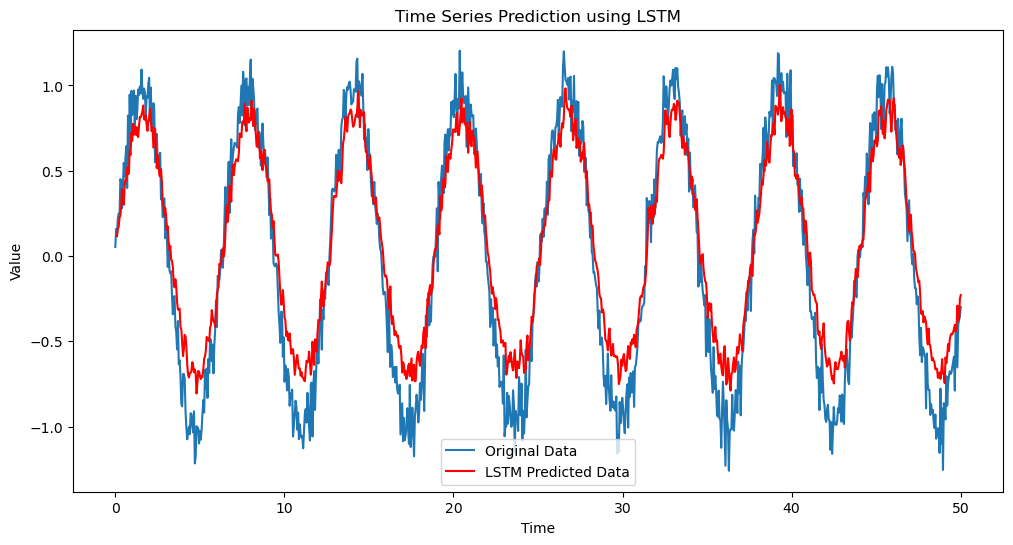

In [5]:


# Step 3: Build the LSTM Model
model = Sequential()

# LSTM layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))

# Dense layer for output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Step 4: Train the model
model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)

# Step 5: Make predictions
train_predict = model.predict(X)

# Invert scaling to get original values back
train_predict = scaler.inverse_transform(train_predict)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time[:len(data_scaled)], scaler.inverse_transform(data_scaled), label='Original Data')
plt.plot(time[time_step:len(train_predict) + time_step], train_predict, label='LSTM Predicted Data', color='red')
plt.title('Time Series Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [9]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


# Invert scaling to get original values back
train_predict = scaler.inverse_transform(train_predict)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_actual, train_predict)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_actual, train_predict)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 1.6582104147625905
Mean Absolute Error (MAE): 1.1048155387494916
